# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('../data/raw/ene1_jun25.csv')
df2 = pd.read_csv('../data/raw/ago10_dic31.csv')

In [3]:
df1.head()

,full_date,date,weekday,time,mood,activities,note_title,note
0,2024-06-25,June 25,Tuesday,10:18 AM,Bien,Feliz | Relajado | Contento | Cansado | Ocupad...,NaN,NaN
1,2024-06-24,June 24,Monday,8:00 PM,Bien,Contento | Ocupado | Confundido | Buen sueño |...,NaN,NaN
2,2024-06-23,June 23,Sunday,8:00 PM,Bien,Feliz | Relajado | Contento | Motivado | Produ...,NaN,NaN
3,2024-06-22,June 22,Saturday,8:00 PM,Bien,Feliz | Relajado | Contento | Cansado | Motiva...,NaN,NaN
4,2024-06-21,June 21,Friday,8:00 PM,Bien,Relajado | Contento | Ansioso | Decepcionado |...,NaN,NaN


In [4]:
df2.head()

,full_date,date,weekday,time,mood,activities,note_title,note
0,2024-12-31,31 Dec,Tuesday,10:45 p.m.,Bien,Buen sueño | Feliz | Emocionado | Relajado | C...,NaN,NaN
1,2024-12-30,30 Dec,Monday,11:10 p.m.,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...,NaN,NaN
2,2024-12-29,29 Dec,Sunday,11:03 p.m.,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...,NaN,NaN
3,2024-12-28,28 Dec,Saturday,10:33 p.m.,Bien,Buen sueño | Relajado | Contento | Productivo ...,NaN,NaN
4,2024-12-27,27 Dec,Friday,11:56 p.m.,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...,NaN,NaN


Antes de comenzar el análisis exploratorio, vamos a arreglar los DataFrames, ya que vienen en formatos diferentes, específicamente para el caso de `time` y `date`, además de que no se necesita de las columnas `note_title` ni `note`.

In [5]:
df1 = df1.drop(columns=['date', 'note_title', 'note'])
df2 = df2.drop(columns=['date', 'note_title', 'note'])

In [6]:
# Convertir el formato de 'time' en df2 al formato AM - PM

df2['time'] = df2['time'].str.replace(r'\.m\.', 'M', regex=True).str.replace(r'a', 'A', regex=True).str.replace(r'p', 'P', regex=True)

In [7]:
# Por defecto axis=0
df = pd.concat([df2, df1])

In [8]:
df.head()

,full_date,weekday,time,mood,activities
0,2024-12-31,Tuesday,10:45 PM,Bien,Buen sueño | Feliz | Emocionado | Relajado | C...
1,2024-12-30,Monday,11:10 PM,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...
2,2024-12-29,Sunday,11:03 PM,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...
3,2024-12-28,Saturday,10:33 PM,Bien,Buen sueño | Relajado | Contento | Productivo ...
4,2024-12-27,Friday,11:56 PM,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...


In [9]:
df.tail()

,full_date,weekday,time,mood,activities
172,2024-01-05,Friday,7:14 PM,Bien,Cansado | Aburrido | Ansioso | Sueño medio | E...
173,2024-01-04,Thursday,9:36 PM,Bien,Feliz | Relajado | Buen sueño | Ejercicio | Co...
174,2024-01-03,Wednesday,7:26 PM,Bien,Feliz | Contento | Buen sueño | Ejercicio | Ag...
175,2024-01-02,Tuesday,8:17 PM,Bien,Feliz | Relajado | Contento | Sueño medio | Ej...
176,2024-01-01,Monday,1:56 PM,Meh,Relajado | Aburrido | Sueño medio


Ahora sí se puede continuar analizando el dataset completo.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 176
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_date   300 non-null    object
 1   weekday     300 non-null    object
 2   time        300 non-null    object
 3   mood        300 non-null    object
 4   activities  300 non-null    object
dtypes: object(5)
memory usage: 14.1+ KB


In [12]:
df.describe(include=['O'])

,full_date,weekday,time,mood,activities
count,300,300,300,300,300
unique,300,7,167,5,300
top,2024-12-31,Tuesday,10:45 PM,Bien,Buen sueño | Feliz | Emocionado | Relajado | C...
freq,1,44,29,227,1


### Estadísticas y visualizaciones anules, mensuales y semanales

In [ ]:
import calendar
import locale

In [13]:
locale.setlocale(locale.LC_TIME, 'es_MX.UTF-8')

# Asignar un color a cada tipo de emoción
mood_data = {
    'Horrible': 'crimson',
    'Mal': 'orange',
    'Meh': 'skyblue',
    'Bien': 'limegreen',
    'Increíble': 'turquoise'
}

# Convertir full_date a tipo datetime para extraer fácilmente el mes
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

# Extraer el mes con tipo numérico
df['month'] = df['full_date'].dt.month

moods_sorted = list(mood_data.keys())

# Columna para convertir moods a números ordenados (1: Terrible a 5: Increíble)
mapped_order = {mood: i for i, mood in enumerate(moods_sorted, start=1)}
df['mood_numeric'] = df['mood'].map(mapped_order)

# Columna para asignar colores en base al mood
df['colors'] = df['mood'].map(mood_data)

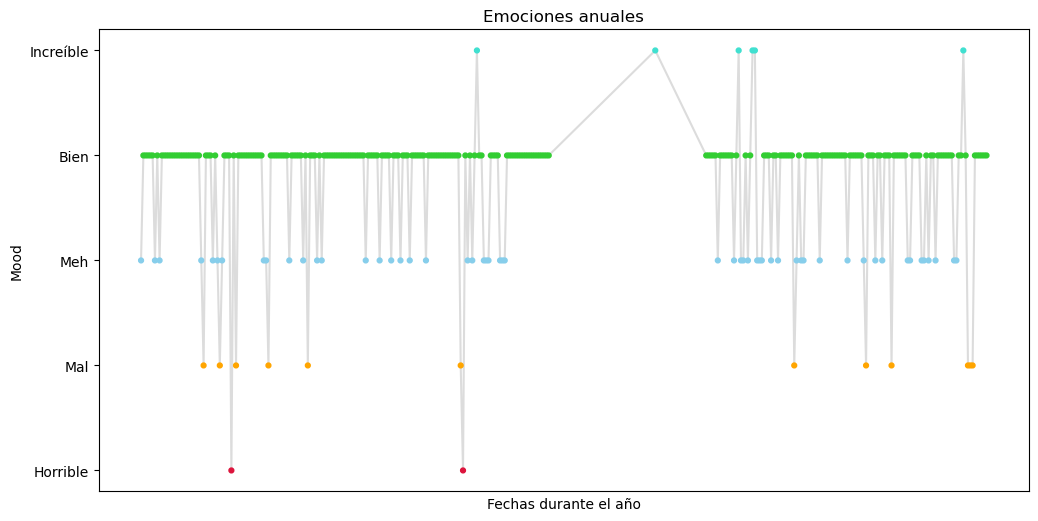

In [14]:
x = df['full_date']
y = df['mood_numeric']

plt.figure(figsize=(12, 6))

plt.plot(x, y, c='gainsboro', zorder=1)
plt.scatter(x, y, c=df['colors'], s=12, zorder=2)

plt.xlabel("Fechas durante el año")
plt.ylabel("Mood")
plt.yticks(ticks=range(1, len(mood_data) + 1), labels=moods_sorted)  # Reemplazar números por categorías originales
plt.xticks([])  # Ocultar etiquetas del eje X

plt.title("Emociones anuales")

plt.show()

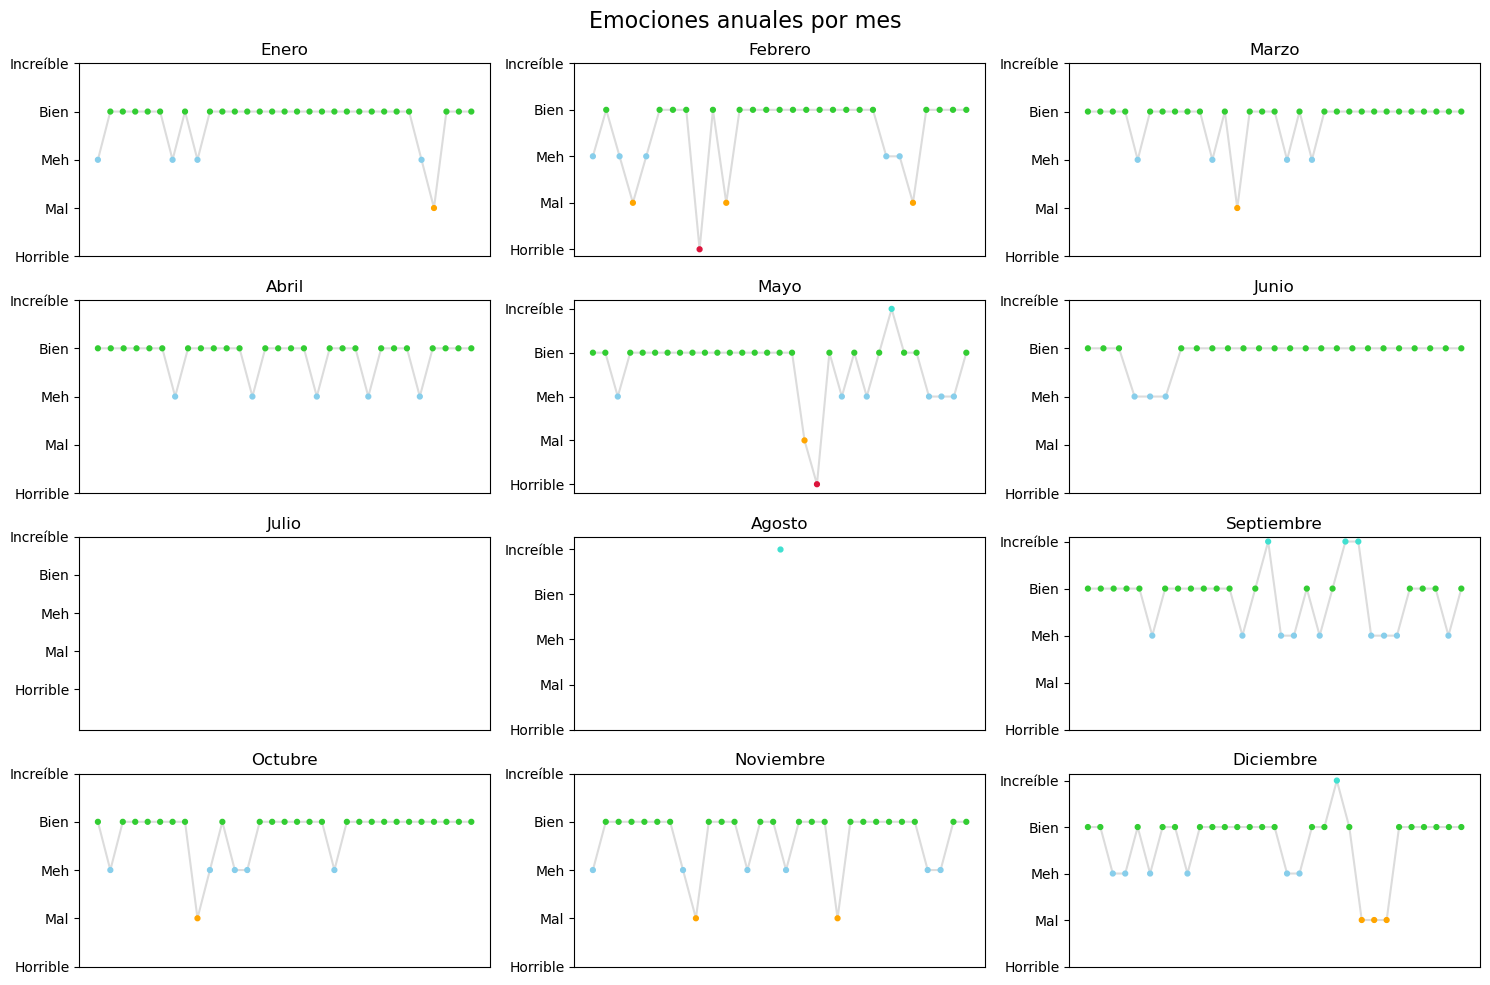

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]  # Seleccionar el subgráfico correspondiente
    df_month = df[df['month'] == month]  # Filtrar los datos del mes actual

    ax.scatter(df_month['full_date'], df_month['mood_numeric'], c=df_month['colors'], s=12, zorder=2)
    ax.plot(df_month['full_date'], df_month['mood_numeric'], c='gainsboro', zorder=1)

    ax.set_title(f'{calendar.month_name[month].capitalize()}')
    ax.set_yticks(range(1, len(mood_data) + 1))  # Reemplazar números por las categorías originales
    ax.set_yticklabels(moods_sorted)
    ax.set_xticks([])

fig.suptitle("Emociones anuales por mes", fontsize=16)
plt.tight_layout()

plt.show()

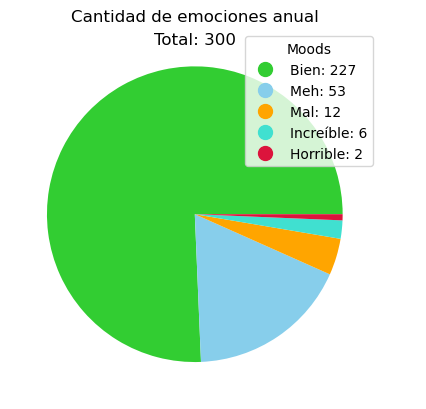

In [16]:
sum_moods = df['mood'].value_counts()
moods = sum_moods.index

colors = [mood_data[mood] for mood in moods]

plt.pie(
    sum_moods, 
    labels=moods,
    colors=colors,
    textprops=dict(color="w")
)

handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='') 
           for color in colors]
labels = [f"{mood}: {sum_moods[mood]}" for mood in moods]
plt.legend(handles, labels, title="Moods", loc='upper right')

plt.title("Cantidad de emociones anual")
plt.text(0, 1.15, f'Total: {df.shape[0]}', ha='center', fontsize=12)

plt.show()

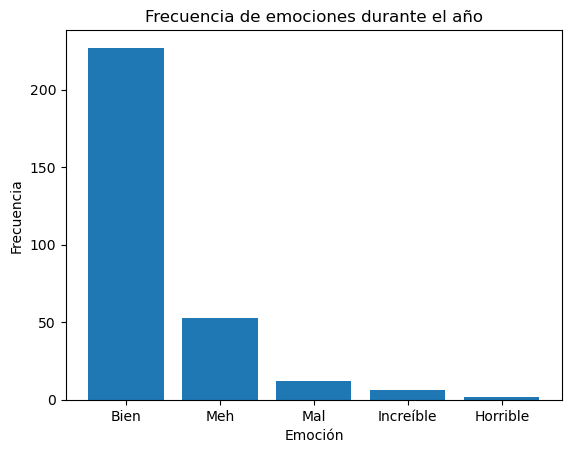

In [27]:
plt.bar(sum_moods.index, sum_moods.values)  
plt.xlabel('Emoción')
plt.ylabel('Frecuencia') 
plt.title('Frecuencia de emociones durante el año')

plt.show() 

Debido a que cada emoción es representada por un número *(1: Terrible a 5: Increíble)*, se pueden hacer estadísticas a partir de esos números discretos.

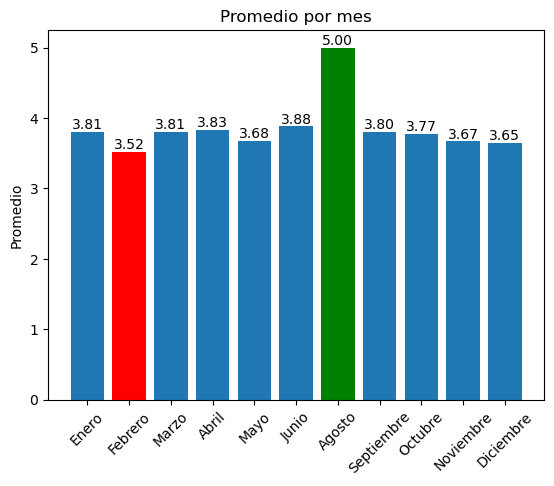

In [28]:
mean_month = df.groupby('month')['mood_numeric'].mean()

max_value = mean_month.max()
min_value = mean_month.min()

max_index = mean_month.idxmax()
min_index = mean_month.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Promedio')
plt.title('Promedio por mes')
plt.xticks(rotation=45)
plt.show()

Para las estadísticas mensuales, y en general, se tiene que considerar que __no hay datos del mes de julio__ y __sólo uno en el mes de agosto__. Por lo cual para el siguiente grafico se considera el promedio a partir de la cantidad total de días 
por mes.
<br>
Esto ya que en la anterior al haber sólo un registro hecho en agosto (Increíble) hace parecer que es el mes con el promedio más alto.

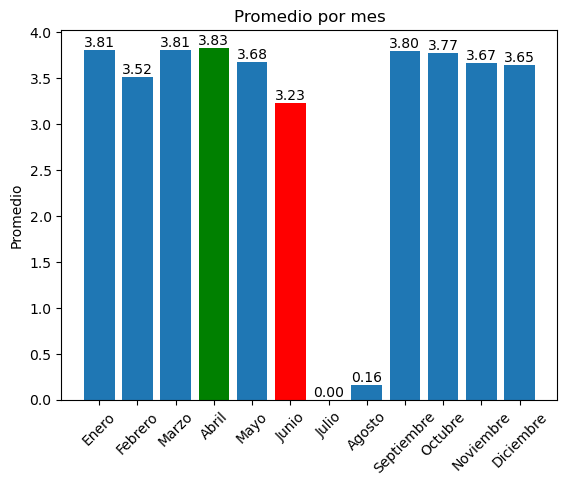

In [29]:
# Cantidad de registros por mes
size_month = pd.Series({1: 31, 2: 29, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31})

# Suma de valores de mood por mes
sum_month = df.groupby('month')['mood_numeric'].sum()
    
mean_month = sum_month / size_month
mean_month = mean_month.fillna(0)

max_value = mean_month.max()
# min_value = mean_month.min()

max_index = mean_month.idxmax()
# min_index = mean_month.idxmin()

colors = ['green' if i == max_index else 'red' if i == 6 else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Promedio')
plt.title('Promedio por mes')
plt.xticks(rotation=45)
plt.show()

Con la gráfica anterior se puede concluir que el mes con **mejor mood** fue en **abril**, mientras que el que tiene el **peor mood** (sin tomar en cuenta a julio y agosto por la cantidad de registros) fue **junio**.
<br>
E incluso a pesar de lo anterior, se debe tomar en cuenta que en el mes de **septiembre** fue el mes con más moods de **Increíble**, mientras que **febrero** y **mayo** fueron los únicos meses con el mood de **Horrible** como se muestra en la siguiente tabla.

In [31]:
df.groupby(['month', 'mood']).size().unstack(fill_value=0)  

mood,Bien,Horrible,Increíble,Mal,Meh
month,,,,,
1,26,0,0,1,4
2,20,1,0,3,5
3,26,0,0,1,4
4,25,0,0,0,5
5,22,1,1,1,6
6,22,0,0,0,3
8,0,0,1,0,0
9,18,0,3,0,9
10,25,0,0,1,5


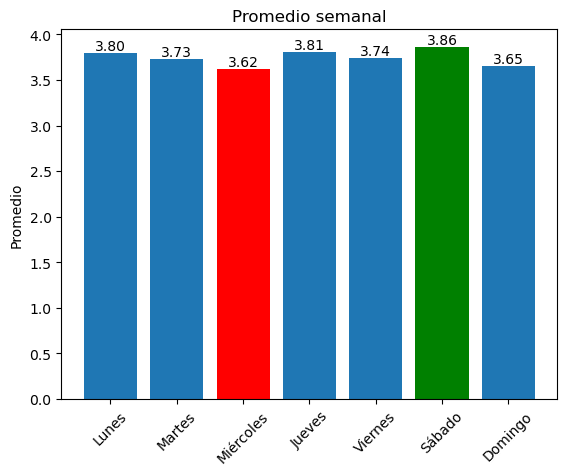

In [32]:
mean_weekday = df.groupby('weekday')['mood_numeric'].mean()

days_translation = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

mean_weekday.index = mean_weekday.index.map(days_translation)

days_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

mean_weekday = mean_weekday.reindex(days_order)  # Reordenar días

max_value = mean_weekday.max()
min_value = mean_weekday.min()

max_index = mean_weekday.idxmax()
min_index = mean_weekday.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_weekday.index]

bars = plt.bar(mean_weekday.index, mean_weekday.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_weekday.values])

plt.ylabel('Promedio')
plt.title('Promedio semanal')
plt.xticks(rotation=45)
plt.show()

Esta anterior grafica representa igualmente el promedio del mood por día de la semana a lo largo del año, donde se muestra que el día con **mejor** mood ha sido el **sábado**, mientras que el que ha tenido **peor** fue el *miércoles**.

In [33]:
df.to_csv('../data/processed/moods_2024.csv', index=False)